In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, chi2

The data collected by Weldon are summarised as follows: the possible values of $X$, namely the set of integers between $0$ and $12$, are stored in `values_of_X`. For each such value, the number of outcomes in Weldon's experiment is stored in `data_weldon': among his $n=26306$ experiments, Weldon observed $185$ times that none of the $12$ dice landed a $5$ or a $6$, and so on.

In [34]:
values_of_X = np.arange(13)
data_weldon = np.array([185, 1149, 3265, 5475, 6114, 5194, 3067, 1331, 403, 105, 14, 4, 0])
n = np.sum(data_weldon)

p = 1 / 3
n_dice = 12
m = len(values_of_X)

p_th = binom.pmf(values_of_X, n_dice, p)
p_exp = data_weldon/n

d = n*sum((p_exp-p_th)**2/p_th)
p_value = 1-chi2.cdf(d, m-1)
print("Test 1")
print("p-valeur =", p_value)

X_bar = 0
for i in range(13):
    X_bar += i*data_weldon[i]
X_bar = X_bar/n
print("Xn_bar/12 =", X_bar/12)
print("Statistique de Pearson:", d)
print("E(X)/12 =", 12*(1/3)/12)

print("Test 2")
p_th_2 = binom.pmf(values_of_X, n_dice, X_bar/12)
d_2 = d = n*sum((p_exp-p_th_2)**2/p_th_2)
p_value = 1-chi2.cdf(d_2, m-2)
print("Statistique de Pearson:",d_2)
print("p-valeur =", p_value)

Test 1
p-valeur = 4.34486357635544e-05
Xn_bar/12 = 0.33769862388808636
Statistique de Pearson: 41.31222283064941
E(X)/12 = 0.3333333333333333
Test 2
Statistique de Pearson: 13.159014083146548
p-valeur = 0.28305955116510706


We reproduce the histogram of the results here.

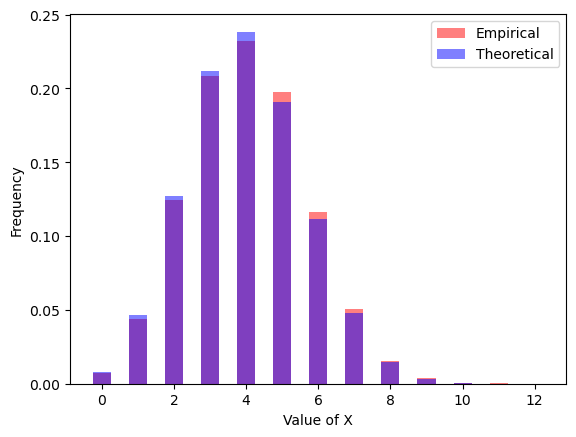

In [18]:
from scipy.stats import binom

# Histogram plot
data_freq = data_weldon / n  # Observed frequencies
theo_freq = binom.pmf(values_of_X, 12, 1/3)  # Theoretical frequencies

plt.bar(values_of_X, data_freq, width=0.5, color=(1, 0, 0, 0.5), label="Empirical")
plt.bar(values_of_X, theo_freq, width=0.5, color=(0, 0, 1, 0.5), label="Theoretical")
plt.xlabel("Value of X")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()